In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import pymysql

import mysql.connector

In [3]:

connection = mysql.connector.connect(

host="127.0.0.1",

user="root",

password="14402575",

database="db"

)

In [4]:

cursor = connection.cursor()

In [5]:
cursor.execute("select * from crime_data")
rows = cursor.fetchall()

In [6]:
for i in rows:
    print (i)

(10304468, '01-08-2020', '01-08-2020', 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3)
(190101086, '01-02-2020', '01-01-2020', 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25)
(191501505, '01-01-2020', '01-01-2020', 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4)
(191921269, '01-01-2020', '01-01-2020', 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'X', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45)
(200100502, '01-02-2020', '01-02-2020', 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGUEROA ST', 34.05, -118.26)
(200100504, '01-04-2020', '01-04-2020', 'Central', 946, 'OTHER MISCELLANEOUS CRIME', 0, 'X', 'POLICE FACILITY', 'IC', '200 E 6TH ST', 34.

In [7]:
df=pd.read_csv('crime_data.csv')
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     472 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [9]:
df.columns #column name

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [10]:
df.shape #rows & columns

(499, 13)

#  Spatial Analysis:  Where are the geographical hotspots for reported crimes?

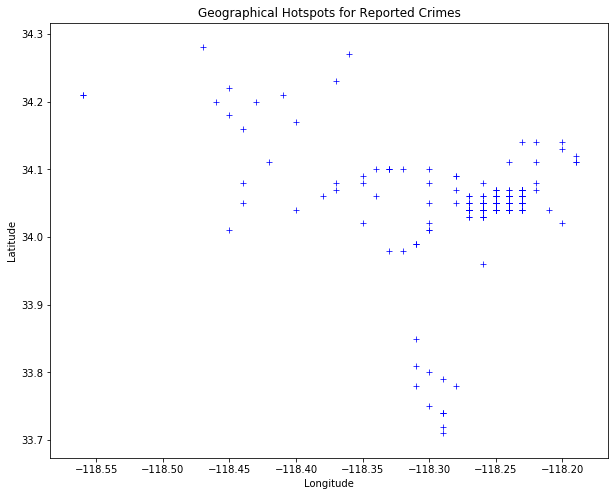

In [11]:

# Execute SQL query to retrieve latitude and longitude data from the crime_data table
cursor.execute("SELECT lat, lon FROM crime_data")

# Fetch all the results and create a DataFrame with columns 'lat' and 'lon'
spatial = pd.DataFrame(cursor.fetchall(), columns=['lat', 'lon'])

# Create a scatter plot to visualize geographical hotspots
plt.figure(figsize=(10, 8))  # Set the size of the plotting area (width, height in inches)

# Scatter plot using seaborn
sns.scatterplot(data=spatial, x='lon', y='lat', marker='+', color='b', s=30)

# Title and labels
plt.title('Geographical Hotspots for Reported Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()



# Victim Demographics:  What is the distribution of victim ages in reported crimes?

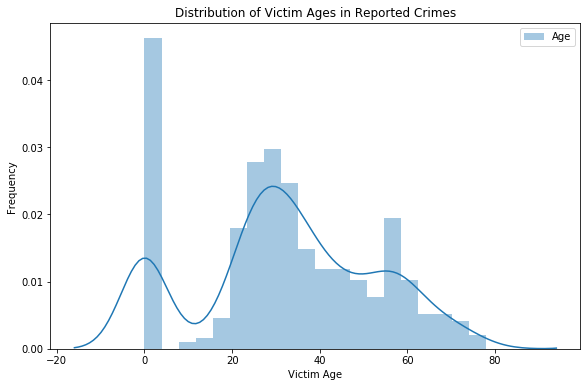

In [17]:

# Execute SQL query to retrieve victim age data from the crime_data table
cursor.execute("SELECT `Vict_Age` FROM crime_data")

# Fetch all the results and create a DataFrame with a column 'Vict_Age'
vict_age_df = pd.DataFrame(cursor.fetchall(), columns=['Vict_Age'])

# Visualize victim age distribution using seaborn's distplot
plt.figure(figsize=(9.5, 6))  # Set the size of the plotting area (width, height in inches)

# Create a distribution plot for victim ages with 20 bins
sns.distplot(vict_age_df['Vict_Age'], bins=20, label='Age')

# Title and labels
plt.title('Distribution of Victim Ages in Reported Crimes')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')

# Display the legend
plt.legend()

# Show the plot
plt.show()


#  Victim Demographics: Is there a significant difference in crime rates between male and female victims?



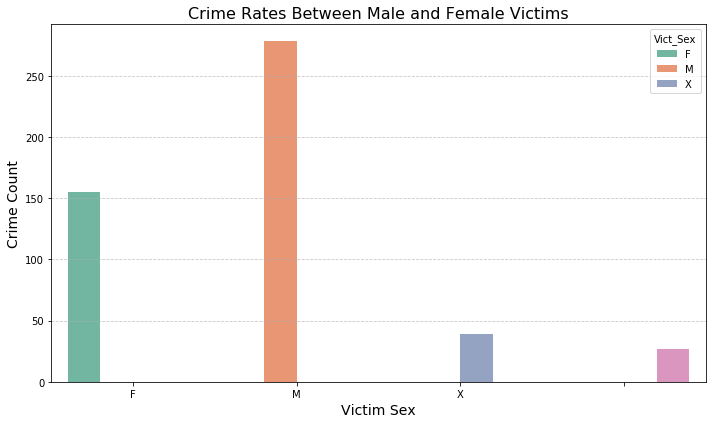

In [13]:
# Execute SQL query to retrieve victim age, sex, and premises description data from the crime_data table
cursor.execute("SELECT Vict_Age, Vict_Sex, Premis_Desc FROM crime_data")

# Fetch all the results and store them in 'victim_data'
victim_data = cursor.fetchall()

cursor.fetchall()

# Create a DataFrame 'df_victims' with columns "Vict_Age", "Vict_Sex", and "Premis_Desc"
df_victims = pd.DataFrame(victim_data, columns=["Vict_Age", "Vict_Sex", "Premis_Desc"])

# Set the size of the plotting area (width, height in inches)
plt.figure(figsize=(10, 6))

# Create a count plot with bars representing the number of occurrences for each gender category
# Use 'hue' to differentiate bars based on the 'Vict_Sex' category and set a color palette
sns.countplot(data=df_victims, x='Vict_Sex', hue='Vict_Sex', palette='Set2')

# Title and labels
plt.title("Crime Rates Between Male and Female Victims", fontsize=16)
plt.xlabel("Victim Sex", fontsize=14)
plt.ylabel("Crime Count", fontsize=14)

# Display the plot with grid lines and a tight layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()







#  Location Analysis: Where do most crimes occur based on the Location column?

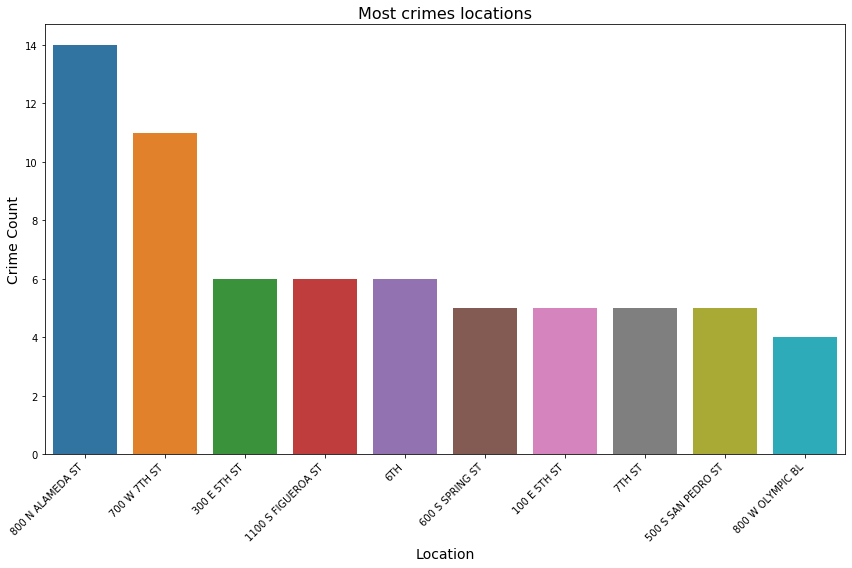

In [88]:
cursor.execute("SELECT Location, COUNT(*) AS Crime_Count FROM crime_data GROUP BY Location ORDER BY Crime_Count DESC LIMIT 10")
top_locations_data = cursor.fetchall()

# Clear any remaining results
cursor.fetchall()

df_top_locations = pd.DataFrame(top_locations_data, columns=["Location", "Crime_Count"])

# Set the size of the plotting area (width, height in inches)
plt.figure(figsize=(12, 8))

# Create a bar plot to visualize the top locations for crimes
sns.barplot(x='Location', y='Crime_Count', data=df_top_locations)

# Title and labels
plt.title("Most crimes locations", fontsize=16)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Crime Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')



# Display the plot
plt.tight_layout()
plt.show()


# Crime Code Analysis: What is the distribution of reported crimes based on Crime Code?

 



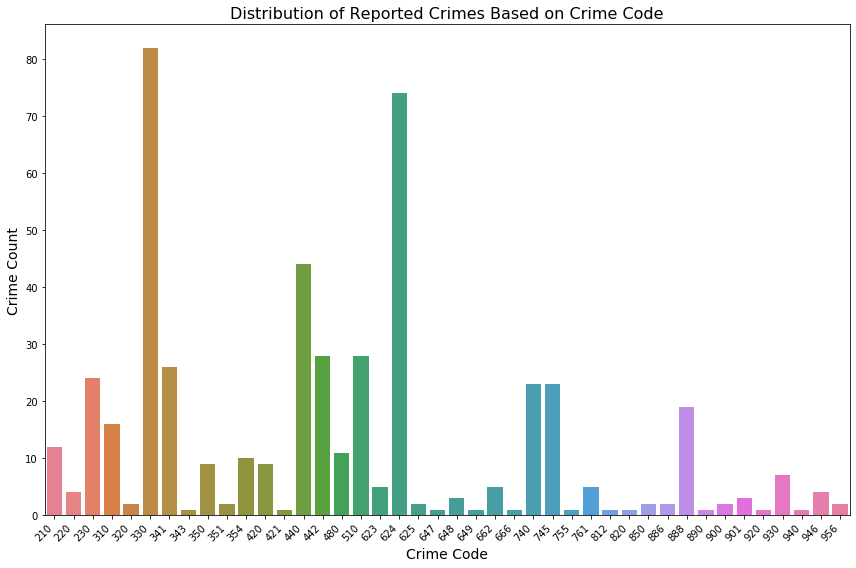

In [102]:
cursor.execute("SELECT crm_cd, COUNT(*) AS Crime_Count FROM crime_data GROUP BY crm_cd ORDER BY Crime_Count")
crime_code_data = cursor.fetchall()

# Clear any remaining results
cursor.fetchall()

df_crime_code = pd.DataFrame(crime_code_data, columns=["crm_cd", "Crime_Count"])

# Set the size of the plotting area (width, height in inches)
plt.figure(figsize=(12, 8))

# Create a bar plot to visualize the distribution of reported crimes based on Crime Code
sns.barplot(x='crm_cd', y='Crime_Count', data=df_crime_code, palette='husl')

# Title and labels
plt.title("Distribution of Reported Crimes Based on Crime Code", fontsize=16)
plt.xlabel("Crime Code", fontsize=14)
plt.ylabel("Crime Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()